<h2 align="center">Part 1</h2>

#### Question 3: Ranking Data - Understanding the co-relation between keyword rankings with description or any other attribute.
Dataset link: https://drive.google.com/file/d/1yuDyU7EjJ8Nai83FDdIF2w4inm17NzBF/view

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model, metrics
from wordcloud import WordCloud, STOPWORDS

sns.set_theme()

In [2]:
df = pd.read_csv('browser_rankings_data.csv',skiprows=1)
df.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2.0,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3066 non-null   int64  
 1   Keyword                          3066 non-null   object 
 2   Rank                             3050 non-null   float64
 3   Country                          3066 non-null   object 
 4   Language                         3066 non-null   object 
 5   Date                             3066 non-null   object 
 6   App ID                           3066 non-null   object 
 7   Date of Last Description Change  3066 non-null   object 
 8   Short Description                3066 non-null   object 
 9   Long Description                 3066 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 239.7+ KB


In [4]:
df.isnull().sum()

ID                                  0
Keyword                             0
Rank                               16
Country                             0
Language                            0
Date                                0
App ID                              0
Date of Last Description Change     0
Short Description                   0
Long Description                    0
dtype: int64

In [5]:
df.shape

(3066, 10)

In [6]:
df['Keyword'].nunique()

7

In [7]:
df.Keyword.value_counts()

browser                         608
android browser                 608
privacy browser                 370
privacy browsers for android    370
best privacy browsers           370
fast browser                    370
ad free browser                 370
Name: Keyword, dtype: int64

In [8]:
df['Country'].nunique()

1

In [9]:
df['Language'].nunique()

1

In [10]:
df['Short Description'].nunique()

9

In [11]:
df['Long Description'].nunique()

13

In [12]:
df['App ID'].nunique()

8

In [13]:
df['App ID'].value_counts()

com.duckduckgo.mobile.android    740
com.cloudmosa.puffinTV           608
com.brave.browser                370
com.vivaldi.browser              370
com.transsion.phoenix            370
com.opera.browser                304
net.fast.web.browser             152
com.android.chrome               152
Name: App ID, dtype: int64

The dataset contains 10 attributes and 3066 records. It is related to ranking of different category of browsers types. There are 7 different categories in keyword (browser). There are 8 different App ID’s. There are 13 and 9 different short and long descriptions respectively.

For checking correlation between two variables i am using Chi squares test,the hypothesis of chi squared test is

* H0 : There is no relation between the variables
* H1 : There is relation between the variables

we can verify hypothesis using P-value that is if the P-value is higher than 0.05, H0 will be accepted otherwise rejected

In [14]:
SL_des = pd.crosstab( df['Short Description'],df['Long Description'])
stats = chi2_contingency(SL_des)

In [15]:
print("P-value is ",stats[1],", Chi square static is",stats[0],', dof is',stats[2])

P-value is  0.0 , Chi square static is 24527.999999999996 , dof is 96


P-value is 0 which means there is a correlation between Short Description and Long Description

In [16]:
RL_des = pd.crosstab( df['Rank'],df['Long Description'])
stats = chi2_contingency(RL_des)

In [17]:
print("P-value is ",stats[1],", Chi square static is",stats[0],', dof is',stats[2])

P-value is  0.0 , Chi square static is 6067.4464664983025 , dof is 1416


P-value is 0 which means there is a correlation between Rank and Long Description

In [18]:
RS_des = pd.crosstab( df['Rank'],df['Short Description'])
stats = chi2_contingency(RS_des)

In [19]:
print("P-value is ",stats[1],", Chi square static is",stats[0],', dof is',stats[2])

P-value is  0.0 , Chi square static is 6067.4464664983025 , dof is 944


P-value is 0 which means there is a correlation between Rank and Long Description

#### 1.Is there any co-relation between short description, long description and ranking?
Ans) Yes there is a correlation between  short description, long description and ranking

In [20]:
Rank_app = pd.crosstab( df['Rank'],df['App ID'])
stats = chi2_contingency(Rank_app)

In [21]:
print("P-value is ",stats[1],", Chi square static is",stats[0],', dof is',stats[2])

P-value is  0.0 , Chi square static is 6067.4464664983025 , dof is 826


Regression is best method to find the cause of App ID for ranking. With regression we can know whther App ID is palying any role in Ranking or not. But first we need to encode the App ID data to apply regression.

In [22]:
df_temp = df[['App ID','Rank']]

encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df[['App ID']]).toarray())

df_temp = df_temp.join(encoder_df)
df_temp.drop('App ID', axis=1, inplace=True)
df_temp.dropna(inplace=True)

df_temp.head()

,Rank,0,1,2,3,4,5,6,7
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
X = df_temp.iloc[:,1:]
y = df_temp['Rank']
reg = linear_model.LinearRegression()
reg.fit(X, y)
print('Coefficients: ', reg.coef_)
print('Regression score: {}'.format(reg.score(X, y)))

Coefficients:  [1.99279859e+12 1.99279859e+12 1.99279859e+12 1.99279859e+12
 1.99279859e+12 1.99279859e+12 1.99279859e+12 1.99279859e+12]
Regression score: 0.6809953502861541


#### 2.Does APP ID (Also known as package name) play any role in ranking?
Ans) Yes App ID is correlated with Rank and it also predicting Rank with a good regression score which means it is playing a role in Ranking

In [24]:
stopwords = set(STOPWORDS)
short_des = ''

for text in df['Short Description']:
    tokens = text.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    short_des += " ".join(tokens)+" "

wordclouds = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(short_des)

long_des = ''
for text in df['Long Description']:
    tokens = text.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    long_des += " ".join(tokens)+" "

wordcloudl = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(long_des)

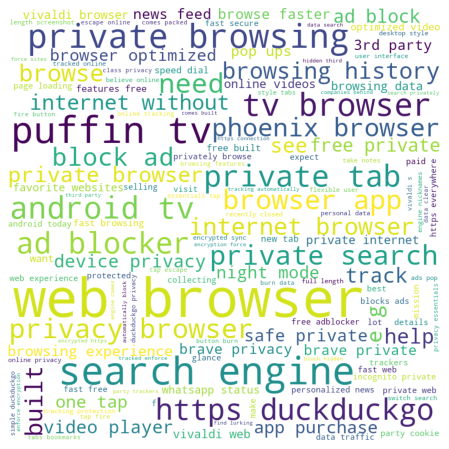

In [25]:
fig = plt.figure(figsize=(8,8))
plt.imshow(wordcloudl)
plt.axis('off')
plt.show()

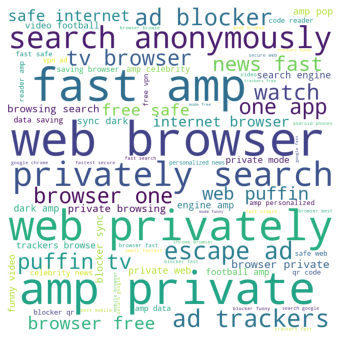

In [26]:
fig = plt.figure(figsize=(8,6))
plt.imshow(wordclouds)
plt.axis('off')
plt.show()

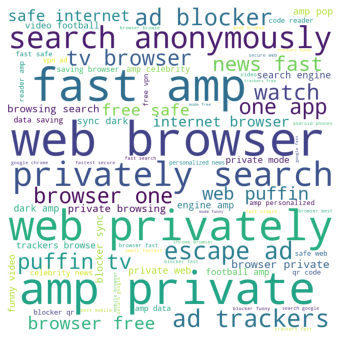

In [27]:
wordcloudls = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(long_des+short_des)
fig = plt.figure(figsize=(8,6))
plt.imshow(wordclouds)
plt.axis('off')
plt.show()

#### 3.Any other pattern or good questions that you can think of and answer?
Questions
1. what are the most frequent words in long description?<br>
    The most frequent words in long description are web, browser, serach, private, engine, etc
    
2. what are the most frequent words in short description?<br>
    The most frequent words in short description are private, browser, amp, etc
    
3. Is there any common words between short and long description?<br>
    From the word clouds for short and long descriptions, we can observe that they have some words in common like browser, private, ad blocker, etc.
